# Compare throughouts

In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

import pandas as pd

import seaborn as sns

In [26]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [27]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [28]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [29]:
path = "dataout/throughput"

os.listdir(path) 

In [30]:
list_of_files = os.listdir(path)

In [32]:
all_df = []
all_dates = []
for filename in list_of_files:
    fullfilename = os.path.join(path,filename)
    date = re.findall("^throughput-(.*)-empty~holo4_003-psf2dffm-multifitatmparams.csv$",filename)[0]
    df = pd.read_csv(fullfilename,index_col=0)
    
    all_df.append(df)
    all_dates.append(date)
    

In [33]:
all_df[0]

,wavelength,newthrou,newthrouerr,oldthrou
0,350.0,0.005181,0.001257,0.061947
1,351.0,0.005521,0.001316,0.062754
2,352.0,0.005908,0.001388,0.063561
3,353.0,0.006352,0.001472,0.064368
4,354.0,0.006855,0.001578,0.065175
...,...,...,...,...
695,1045.0,0.002316,0.000573,0.011178
696,1046.0,0.002135,0.000530,0.010777
697,1047.0,0.001964,0.000488,0.010376
698,1048.0,0.001800,0.000449,0.009975


In [23]:
re.findall("^throughput-(.*)-empty~holo4_003-psf2dffm-multifitatmparams.csv$",filename)[0]

'2022-09-27'

In [35]:
NF = len(all_df)

In [36]:
hls_colors = sns.color_palette("hls", NF)

In [39]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NF)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NF), alpha=1)

Text(0.5, 0, 'wavelength (nm)')

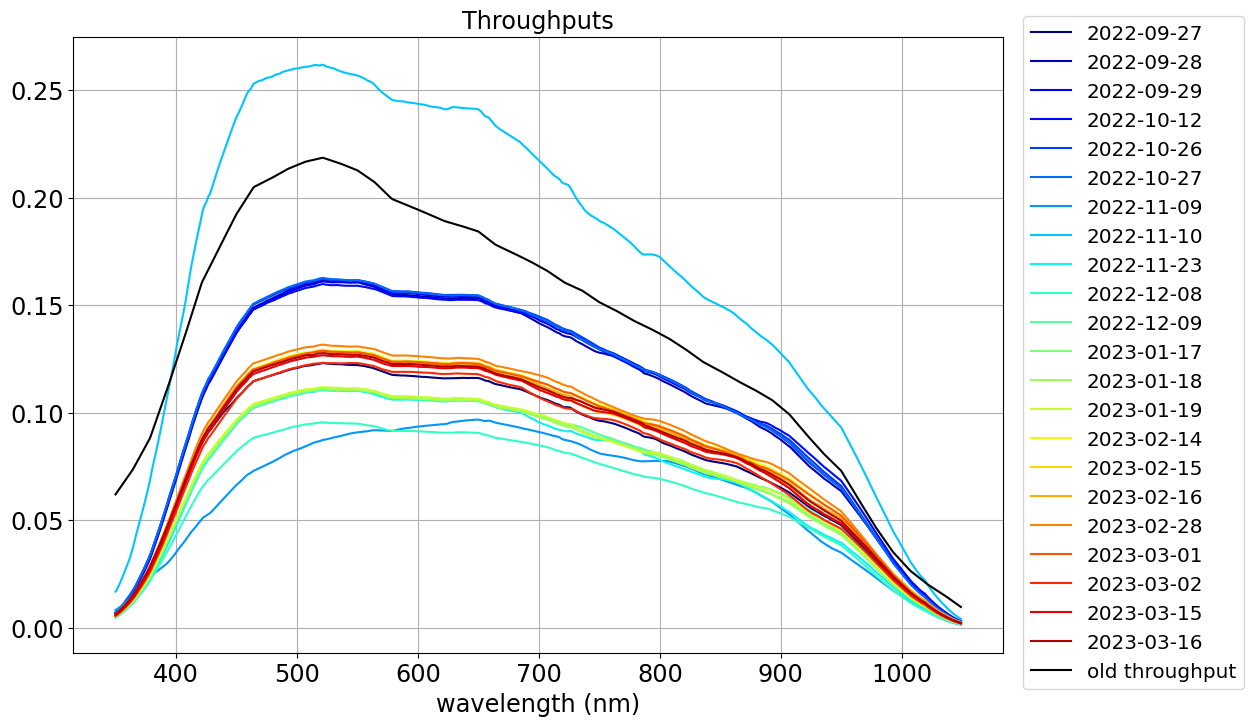

In [53]:
fig = plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)
for idx in range(NF):
    wl = all_df[idx]["wavelength"]
    tr = all_df[idx]["newthrou"]
    tr0 = all_df[idx]["oldthrou"]
    thdt = all_dates[idx]
    
    ax.plot(wl,tr,label=thdt,c=all_colors[idx])

    
ax.plot(wl,tr0,'k-',label='old throughput')
    
ax.legend(bbox_to_anchor=(1.01, 1.05))
ax.set_title("Throughputs")
ax.grid()
ax.set_xlabel("wavelength (nm)")